In [7]:
# install packages
import piplite
await piplite.install('seaborn')
await piplite.install('plotly')
await piplite.install('nbformat')
await piplite.install('chart_studio')

In [8]:
# import all needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import chart_studio as py
import ssl 

# import the rental dataset using pandas
rent_df = pd.read_csv("House_Rent_Dataset.csv")

# check the dataset for null and duplicated values
rent_df.isnull().sum()
rent_df.duplicated().sum()

# Exploring the dataset
print(rent_df.head())
print(rent_df.describe())
print(rent_df.columns)

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

# Dataset Analysis
- BHK: Number of Bedrooms, Hall, Kitchen.
- Rent: Rent of the Houses/Apartments/Flats.
- Size: Size of the Houses/Apartments/Flats in Square Feet.
- Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- Area Locality: Locality of the Houses/Apartments/Flats.
- City: City where the Houses/Apartments/Flats are Located.
- Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
- Bathroom: Number of Bathrooms.
- Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

The dataset does not contain any null or missing values

Rent, Size, BHK, and Bathrooms are the numerical features and all others as Categorical Features.

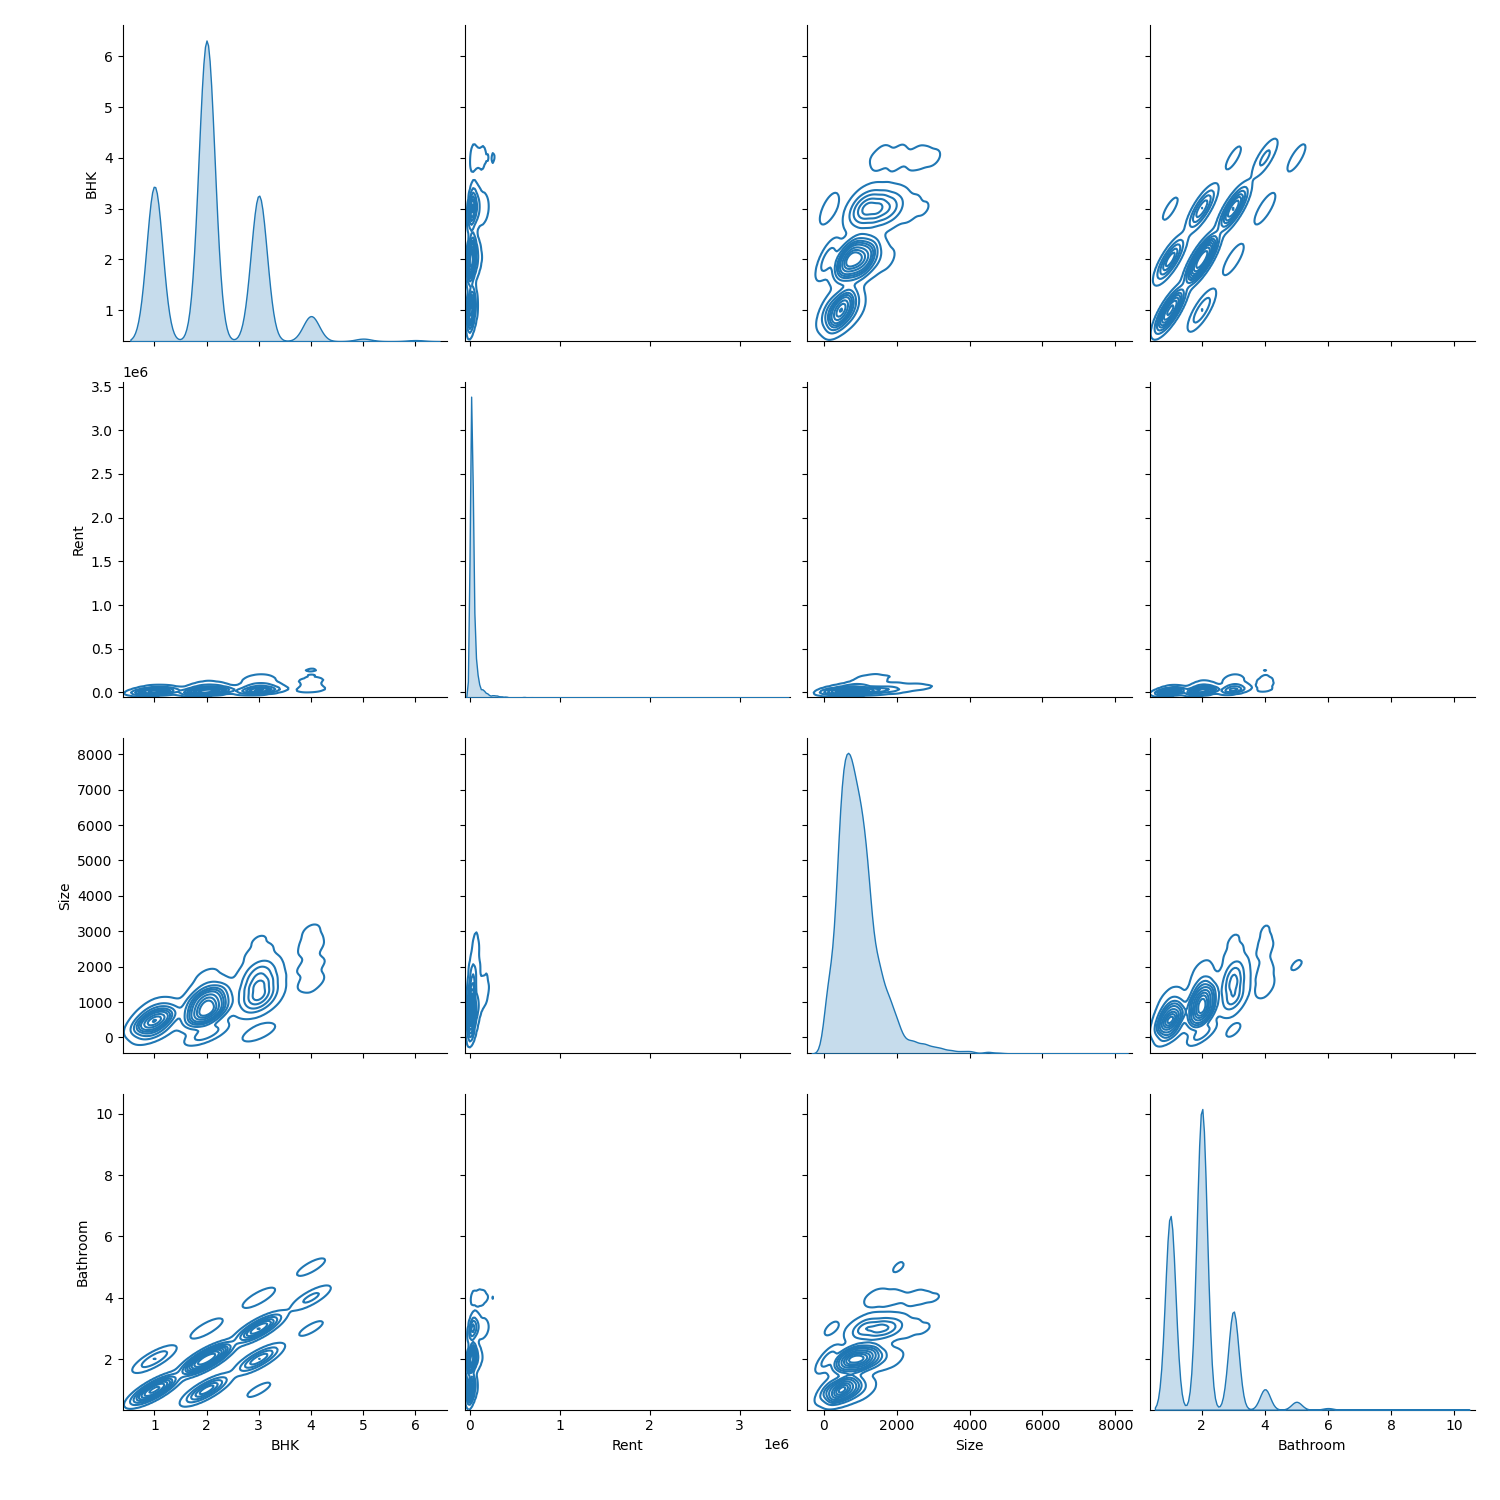

In [9]:
# Visualize the correlations within data
rent_pairs = sns.pairplot(data=rent_df, kind="kde")
rent_pairs.fig.set_size_inches(15, 15)
rent_pairs.fig.suptitle("Pair Plot", y=1.02)
plt.show()

# Bivariate Analysis 
- **BHK and Bathrooms:** There is a visible positive relationship  between number of bathrooms and BHK this is because the BHK count includes Bathrooms.
- **BHK and Rent:** There is a small positive correlation between BHK and rent this may because as the number of BHK increases rent does as well. 
- **BHK and Size:** There is a visible positive relationship  between BHK and size this is because if there are more BHK the size of the property increases. 
- **Bathrooms and Size and Rent:**  There is a visible positive relationship  between number of bathrooms and size and rent this is because the increased number of bathrooms presumably increases the property size and rent.
- **Size and Rent:** There is a small positive correlation, which will be explored further in the analysis. 

In [ ]:
# Bivariate Analysis of variables using Box plots
rent_fig = make_subplots(
    rows=7,
    cols=2,
    subplot_titles=(
        "BHK vs Rent",
        "BHK vs Size",
        "Area Type vs Rent",
        "Area Type vs Size",
        "City vs Rent",
        "City vs Size",
        "Furnishing Status vs Rent",
        "Furnishing Status vs Size",
        "Tenant Preferred vs Rent",
        "Tenant Preferred vs Size",
        "Bathroom vs Size",
        "Bathroom vs Rent",
        "Point of Contact vs Size",
        "Point of Contact vs Rent",
    ),
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["BHK"].values,
        y=rent_df["Rent"].values,
        name="BHK vs Rent",
        boxmean="sd",
    ),
    row=1,
    col=1,
)

rent_fig.append_trace(
    go.Box(
        x=rent_df["BHK"].values,
        y=rent_df["Size"].values,
        name="BHK vs Size",
        boxmean="sd",
    ),
    row=1,
    col=2,
)

# Row 2
rent_fig.append_trace(
    go.Box(
        x=rent_df["Area Type"].values,
        y=rent_df["Rent"].values,
        name="Area Type vs Rent",
        boxmean="sd",
    ),
    row=2,
    col=1,
)

rent_fig.append_trace(
    go.Box(
        x=rent_df["Area Type"].values,
        y=rent_df["Size"].values,
        name="Area Type vs Size",
        boxmean="sd",
    ),
    row=2,
    col=2,
)

# Row 3
rent_fig.append_trace(
    go.Box(
        x=rent_df["City"].values,
        y=rent_df["Rent"].values,
        name="City vs Rent",
        boxmean="sd",
    ),
    row=3,
    col=1,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["City"].values,
        y=rent_df["Size"].values,
        name="City vs Size",
        boxmean="sd",
    ),
    row=3,
    col=2,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Furnishing Status"].values,
        y=rent_df["Rent"].values,
        name="Furnishing Status vs Rent",
        boxmean="sd",
    ),
    row=4,
    col=1,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Furnishing Status"].values,
        y=rent_df["Size"].values,
        name="Furnishing Status vs Size",
        boxmean="sd",
    ),
    row=4,
    col=2,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Tenant Preferred"].values,
        y=rent_df["Rent"].values,
        name="Tenant Preferred vs Rent",
        boxmean="sd",
    ),
    row=5,
    col=1,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Tenant Preferred"].values,
        y=rent_df["Size"].values,
        name="Tenant Preferred vs Size",
        boxmean="sd",
    ),
    row=5,
    col=2,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Bathroom"].values,
        y=rent_df["Rent"].values,
        name="Bathroom vs Rent",
        boxmean="sd",
    ),
    row=6,
    col=1,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Bathroom"].values,
        y=rent_df["Size"].values,
        name="Bathroom vs Size",
        boxmean="sd",
    ),
    row=6,
    col=2,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Point of Contact"].values,
        y=rent_df["Rent"].values,
        name="Point of Contact vs Rent",
        boxmean="sd",
    ),
    row=7,
    col=1,
)
rent_fig.append_trace(
    go.Box(
        x=rent_df["Point of Contact"].values,
        y=rent_df["Size"].values,
        name="Point of Contact vs Size",
        boxmean="sd",
    ),
    row=7,
    col=2,
)
rent_fig["layout"]["xaxis"]["title"] = "BHK"
rent_fig["layout"]["xaxis2"]["title"] = "BHK"
rent_fig["layout"]["yaxis"]["title"] = "Rent"
rent_fig["layout"]["yaxis2"]["title"] = "Size"

rent_fig["layout"]["xaxis3"]["title"] = "Area Type"
rent_fig["layout"]["xaxis4"]["title"] = "Area Type"
rent_fig["layout"]["yaxis3"]["title"] = "Rent"
rent_fig["layout"]["yaxis4"]["title"] = "Size"

rent_fig["layout"]["xaxis5"]["title"] = "City"
rent_fig["layout"]["xaxis6"]["title"] = "City"
rent_fig["layout"]["yaxis5"]["title"] = "Rent"
rent_fig["layout"]["yaxis6"]["title"] = "Size"

rent_fig["layout"]["xaxis7"]["title"] = "Furnishing Status"
rent_fig["layout"]["xaxis8"]["title"] = "Furnishing Status"
rent_fig["layout"]["yaxis7"]["title"] = "Rent"
rent_fig["layout"]["yaxis8"]["title"] = "Size"

rent_fig["layout"]["xaxis9"]["title"] = "Tenant Preferred"
rent_fig["layout"]["xaxis10"]["title"] = "Tenant Preferred"
rent_fig["layout"]["yaxis9"]["title"] = "Rent"
rent_fig["layout"]["yaxis10"]["title"] = "Size"

rent_fig["layout"]["xaxis11"]["title"] = "Bathroom"
rent_fig["layout"]["xaxis12"]["title"] = "Bathroom"
rent_fig["layout"]["yaxis11"]["title"] = "Rent"
rent_fig["layout"]["yaxis12"]["title"] = "Size"

rent_fig["layout"]["xaxis13"]["title"] = "Point of Contact"
rent_fig["layout"]["xaxis14"]["title"] = "Point of Contact"
rent_fig["layout"]["yaxis13"]["title"] = "Rent"
rent_fig["layout"]["yaxis14"]["title"] = "Size"

rent_fig.update_layout(
    title=dict(text="Box Plots for bivariate analysis", font=dict(size=30)),
    height=1500,
)
rent_fig.show()
py.offline.iplot(rent_fig)

# BoxPlot Analysis
- BHK vs Rent: There is an outlier in the data for 3 BHK which shows that for 3 BHK there is rent up to 3.5M. The data shows the number of BHK with the highest average rent is 5 BHK. This may entice buyers to choose to rent either 4 or 6 BHK rather than 5.

- BHK vs Size: This plot shows what is expected, as the BHK increases the size increases as well. Yet it should be noted that there are several outliers in the data hence renters may be renting the same number of BHK with different sizes.

- Area Type vs Rent: Carpet area has the highest standard deviation of the Area types. Further carpet area has the highest mean rent of the area types.

- Area Type vs Size: Carpet area and Super area are statistically very similar. There is less presence of built area.

- City vs Rent: Mumbai is the city with the highest median rent, this is followed by Delhi. This is validated as Mumbai is known as the financial capital of India and Delhi is the capital of India. There is an outlier in the data for Bangalore.

- City vs Size: The median sizes of properties in Hyderabad, Bangalore, Chennai are the highest. This is presumably due to Mumbai and Delhi having a larger urban population living in smaller properties.

- Furnishing Status vs Rent: Predicably the median rent increases from unfurnished to furnished. The semi-furnished homes have the highest standard deviation meaning renters have options of mid to low-priced properties.

- Furnishing Status vs Size: Semi furnished properties and furnished properties are statistically similar. There are more outliers in the semi furnished properties.

- Tenant Preferred vs Rent: The rent for bachelors preferred has the highest standard deviation in the data. This shows that there is more availability of a range of prices for these renters.

- Tenant Preferred vs Size: Median house size increases for just families, this is because families usually have more members of the household and need a greater sized property.

- Bathroom vs Rent: The number of bathrooms at first increases mean rent, then decreases after 5 bathrooms.

- Bathroom vs Size: The number of bathrooms causes as increase in size, this is because as there is an increase in bathrooms the size of the house will most likely increase.

- Point of Contact vs Rent: when the point of contact is an agent the median rent is the highest. It is almost three times the median cost of contacting an owner.

- Point of Contact vs Size: The relationship between size and point of contact being an agent or owner are statistically similar. Yet the size when contacting an agent is greater. 


In [ ]:
# Relationship between House Rent and House Size
x = rent_df["Rent"]
y = rent_df["Size"]
colors = rent_df["Size"]
sizes = rent_df["Size"]

plt.xlabel("Rent")
plt.ylabel("Size SqFt")
plt.ticklabel_format(style="plain")
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap="RdBu")
plt.colorbar()
plt.show()

# House Rent and Size Relationship
This analysis shows a more visible outlier than in the original grid plot analysis where rent is 3.5 M yet size is only 3000 SqFt. Further this shows that rent does not necessarily increase with size to a large extent. 

In [ ]:
# Multivariate analysis of Size vs Rent and BHK
fig = make_subplots(
    rows=1, cols=1, subplot_titles=("Scatter Plot of Size vs Rent and BHK")
)
fig.append_trace(
    go.Scatter(
        x=rent_df["BHK"].values,
        y=rent_df["Size"].values,
        name="Size vs Rent and BHK",
        mode="markers",
        marker_color=rent_df["BHK"],
        marker_size=rent_df["Rent"] / 20000,
    ),
    row=1,
    col=1,
)
fig.update_layout(legend={"itemsizing": "trace"})
fig.update_layout(
    showlegend=False,
    title=dict(text="Scatter Plots for Multivariate Analysis", font=dict(size=30)),
    height=1500,
)
fig["layout"]["xaxis1"]["title"] = "BHK"
fig["layout"]["yaxis1"]["title"] = "Size in SqFt"
fig.show()

# Scatter Plot Analysis 
- The data shows that as the number of BHK increases the rent and the size increase as well. 
- There is a large marker for 3 BHK and size of 2500 SqFt this shows that the rent is very high for these properties. This may be a very popular property type.
- There are some outliers to the data such as for 1 BHK there is a property with a very large size of 8000 SqFt. 
- Rent and size is very diverse for 4 BHK meaning there may be many options for renters within those property classifications. 

In [ ]:
# Analysis using K-means clustering
rent_kmeans = rent_df.loc[:, ["Rent", "Size"]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(rent_kmeans)
# inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# plot graph of elbow method
sns.lineplot(wcss, marker="o", color="red")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Optimal clustering is 3

# K-Means operations
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=43)
SqFt_kmeans = kmeans.fit_predict(rent_kmeans)

# visualising the Kmeans
plt.scatter(rent_kmeans[:, 0], rent_kmeans[:, 1], s=10, c="mediumpurple")
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red"
)
plt.title("Clusters of Properties")
plt.xlabel("Rent")
plt.ylabel("Size in SqFt")
plt.show()


# K-Means Clustering Analysis
This analysis is done using K-Means clustering. This attempts to divide n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Hence, The properties will be clustered by the group which they best fit by rent and size.

## Elbow method
- The elbow method plots the number of clusters by the WCSS for the data given, the elbow of the curve is the optimal number of k clusters for the data. The elbow of this data is identified at 3 k clusters.

## K-Clusters
- There are three clusters in the data. These are shown on top of a scatter plot of Rent vs Size (SqFt). The first cluster identified is a very low rent with a size of 1000 SqFt. The second cluster is at around 0.5 M rent and 2000 (SqFt). The third cluster is at 3.5 M rent and 3000 SqFt. The properties from the third cluster were identified earlier in the house and rent relationship analysis.
- Alternative analysis such as Hierarchial clustering can be done with this data, however, K-means clustering is useful for large data sets as it works in a linear method.